# ITM Attrition Project

### _Problem Statement-_

##### _A large company named XYZ, employs, at any given point of time, around 4000 employees. However, every year, around 15% of its employees leave the company and need to be replaced with the talent pool available in the job market. The management believes that this level of attrition (employees leaving, either on their own or because they got fired) is bad for the company, because of the following reasons -_

_The former employees’ projects get delayed, which makes it difficult to meet timelines, resulting in a reputation loss among consumers and partners
A sizeable department has to be maintained, for the purposes of recruiting new talent
More often than not, the new employees have to be trained for the job and/or given time to acclimatise themselves to the company
Hence, the management has contracted an HR analytics firm to understand what factors they should focus on, in order to curb attrition. In other words, they want to know what changes they should make to their workplace, in order to get most of their employees to stay. Also, they want to know which of these variables is most important and needs to be addressed right away._

_Since you are one of the star analysts at the firm, this project has been given to you._

### _Goal-_

_The results thus obtained will be used by the management to understand what changes they should make to their workplace, in order to get most of their employees to stay._




# *Data Preparation : Load, Clean and Format*


In [167]:
##Importing the packages
#Data processing packages
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import LabelEncoder

#Visualization packages
import matplotlib.pyplot as plt 
import seaborn as sns 

#Stats packages
from scipy.stats import pointbiserialr
from scipy.stats import pearsonr, chi2_contingency, wilcoxon, friedmanchisquare, mannwhitneyu, kruskal, chi2_contingency
from scipy.stats import ttest_1samp, ttest_rel, ttest_ind


In [168]:
df = pd.read_csv('general_data.csv') #importing data-set
df.head(5) #Checking first 5 rows

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [169]:
df.columns #Checking headers

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [170]:
df.isnull() #check null entries

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4406,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4407,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4408,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [171]:
df.isna() #Check NA entries

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4406,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4407,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4408,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [172]:
df.dropna(axis= 0) # Dropping NAs

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,29,No,Travel_Rarely,Sales,4,3,Other,1,4405,Female,...,1.0,Y,18,8,0,6.0,2,6,1,5
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,3.0,Y,17,8,1,10.0,5,3,0,2
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,2.0,Y,15,8,0,10.0,2,3,0,2
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,0.0,Y,20,8,0,5.0,4,4,1,2


In [173]:
df.duplicated() #Check duplicates

0       False
1       False
2       False
3       False
4       False
        ...  
4405    False
4406    False
4407    False
4408    False
4409    False
Length: 4410, dtype: bool

In [174]:
df.drop_duplicates() #Drop duplicates if any

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,3.0,Y,17,8,1,10.0,5,3,0,2
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,2.0,Y,15,8,0,10.0,2,3,0,2
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,0.0,Y,20,8,0,5.0,4,4,1,2
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,...,0.0,Y,14,8,1,10.0,2,9,7,8


In [175]:
df.info() #Check if there are any null values #Seems like no-null value left

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

###### _Removing columns that add no value to out analysis_

In [176]:
df.describe(include='all') #Both Categorical and numeric columns are included to check variance in individual frequencies.

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4410.000000,4410,4410,4410,4410.000000,4410.000000,4410,4410.0,4410.000000,4410,...,4391.000000,4410,4410.000000,4410.0,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000
unique,NaN,2,3,3,NaN,NaN,6,NaN,NaN,2,...,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,Male,...,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,3699,3129,2883,NaN,NaN,1818,NaN,NaN,2646,...,NaN,4410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,NaN,9.192517,2.912925,NaN,1.0,2205.500000,NaN,...,2.694830,NaN,15.209524,8.0,0.793878,11.279936,2.799320,7.008163,2.187755,4.123129
std,9.133301,NaN,NaN,NaN,8.105026,1.023933,NaN,0.0,1273.201673,NaN,...,2.498887,NaN,3.659108,0.0,0.851883,7.782222,1.288978,6.125135,3.221699,3.567327
min,18.000000,NaN,NaN,NaN,1.000000,1.000000,NaN,1.0,1.000000,NaN,...,0.000000,NaN,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,NaN,2.000000,2.000000,NaN,1.0,1103.250000,NaN,...,1.000000,NaN,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,NaN,7.000000,3.000000,NaN,1.0,2205.500000,NaN,...,2.000000,NaN,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,NaN,14.000000,4.000000,NaN,1.0,3307.750000,NaN,...,4.000000,NaN,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000


In [177]:
df['Over18'].value_counts() 


Y    4410
Name: Over18, dtype: int64

In [178]:
df['StandardHours'].value_counts()

8    4410
Name: StandardHours, dtype: int64

In [179]:
df['EmployeeCount'].value_counts()

1    4410
Name: EmployeeCount, dtype: int64

###### _Removing the following columns as they are not adding any values. The standard deviation of EmployeeCount and StandardHours are zero. Further, for categorical variables like Over18 we see that all employees are above 18. Apart from all I would like to drop EmployeeID as well._

In [180]:
#These fields does not add value, hence removed
df_1= df.drop(['EmployeeCount','Over18', 'StandardHours', 'EmployeeID'], axis = 1)

In [181]:
df_1.describe()

,Age,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,2.063946,65029.312925,2.694830,15.209524,0.793878,11.279936,2.799320,7.008163,2.187755,4.123129
std,9.133301,8.105026,1.023933,1.106689,47068.888559,2.498887,3.659108,0.851883,7.782222,1.288978,6.125135,3.221699,3.567327
min,18.000000,1.000000,1.000000,1.000000,10090.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,1.000000,29110.000000,1.000000,12.000000,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,2.000000,49190.000000,2.000000,14.000000,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,3.000000,83800.000000,4.000000,18.000000,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,5.000000,199990.000000,9.000000,25.000000,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


In [182]:
df_1.median() #Checking median

Age                           36.0
DistanceFromHome               7.0
Education                      3.0
JobLevel                       2.0
MonthlyIncome              49190.0
NumCompaniesWorked             2.0
PercentSalaryHike             14.0
StockOptionLevel               1.0
TotalWorkingYears             10.0
TrainingTimesLastYear          3.0
YearsAtCompany                 5.0
YearsSinceLastPromotion        1.0
YearsWithCurrManager           3.0
dtype: float64

In [183]:
df_1.var() #Checking variance

Age                        8.341719e+01
DistanceFromHome           6.569144e+01
Education                  1.048438e+00
JobLevel                   1.224760e+00
MonthlyIncome              2.215480e+09
NumCompaniesWorked         6.244436e+00
PercentSalaryHike          1.338907e+01
StockOptionLevel           7.257053e-01
TotalWorkingYears          6.056298e+01
TrainingTimesLastYear      1.661465e+00
YearsAtCompany             3.751728e+01
YearsSinceLastPromotion    1.037935e+01
YearsWithCurrManager       1.272582e+01
dtype: float64

In [184]:
df_1.skew() #Checking Skewness of the data. It will help in choosing parametric and non-parametric tests.

Age                        0.413005
DistanceFromHome           0.957466
Education                 -0.289484
JobLevel                   1.024703
MonthlyIncome              1.368884
NumCompaniesWorked         1.026767
PercentSalaryHike          0.820569
StockOptionLevel           0.968321
TotalWorkingYears          1.116832
TrainingTimesLastYear      0.552748
YearsAtCompany             1.763328
YearsSinceLastPromotion    1.982939
YearsWithCurrManager       0.832884
dtype: float64

In [185]:
df_1.kurtosis() #Check Kurtosis

Age                       -0.405951
DistanceFromHome          -0.227045
Education                 -0.560569
JobLevel                   0.395525
MonthlyIncome              1.000232
NumCompaniesWorked         0.007287
PercentSalaryHike         -0.302638
StockOptionLevel           0.361086
TotalWorkingYears          0.912936
TrainingTimesLastYear      0.491149
YearsAtCompany             3.923864
YearsSinceLastPromotion    3.601761
YearsWithCurrManager       0.167949
dtype: float64

In [186]:
#Check the structure of data.
df_1.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
Gender                      object
JobLevel                     int64
JobRole                     object
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked         float64
PercentSalaryHike            int64
StockOptionLevel             int64
TotalWorkingYears          float64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
dtype: object

######  _From above univariate analysis, it can be seen that :_
######  1.  Age, Education & DistanceFromHome are Platykurtic and other variables are Leptokurtic. Only Number of Compnies worked is Mesokurtic.
######  2.  Age & Education  are normally skewed as per - 0.5 to +0.5 rule.
###### 3. Mean Monthly Income is 65k and standard variation is 47k. As kurtosis is around 1, it means most employees's salaries are concentrated towards the mean.
###### 4. Mean Age is 36 years with slight standard variation of 9 years. Age is normally shaped but negative sign in the kurtosis suggests thick tails. 


In [187]:
df.Age.describe()

count    4410.000000
mean       36.923810
std         9.133301
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64

In [188]:
df_2= df_1.replace(['Yes', 'No'], [1,0]) #Making a data frame with encoded Attrition column.
df_2.head()
df_3= df_2.copy()

In [189]:
le=LabelEncoder()  #Encoding some categorical Variables
df_3['BusinessTravel']=le.fit_transform(df_3.BusinessTravel)
df_3['DistanceFromHome']=le.fit_transform(df_3.DistanceFromHome)

df_3['Gender']=le.fit_transform(df_3.Gender)

df_3['MaritalStatus']=le.fit_transform(df_3.MaritalStatus)



In [190]:
Att_yes= df[df_2['Attrition']== 1]
Att_yes

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
6,28,Yes,Travel_Rarely,Research & Development,11,2,Medical,1,7,Male,...,2.0,Y,20,8,1,5.0,2,0,0,0
13,47,Yes,Non-Travel,Research & Development,1,1,Medical,1,14,Male,...,1.0,Y,11,8,2,10.0,4,10,9,9
28,44,Yes,Travel_Frequently,Research & Development,1,2,Medical,1,29,Male,...,3.0,Y,14,8,1,19.0,2,1,0,0
30,26,Yes,Travel_Rarely,Research & Development,4,3,Medical,1,31,Male,...,2.0,Y,11,8,0,5.0,5,3,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4381,29,Yes,Travel_Rarely,Research & Development,7,1,Life Sciences,1,4382,Female,...,1.0,Y,21,8,0,4.0,2,4,0,1
4386,33,Yes,Travel_Rarely,Sales,11,4,Marketing,1,4387,Male,...,5.0,Y,21,8,0,8.0,2,5,0,4
4388,33,Yes,Travel_Rarely,Sales,1,3,Life Sciences,1,4389,Male,...,7.0,Y,11,8,0,13.0,2,9,1,7
4391,32,Yes,Travel_Rarely,Sales,23,1,Life Sciences,1,4392,Male,...,0.0,Y,11,8,0,4.0,2,3,1,2


In [191]:
Att_not= df[df_2['Attrition']== 0]
Att_not

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4
5,46,No,Travel_Rarely,Research & Development,8,3,Life Sciences,1,6,Female,...,3.0,Y,13,8,0,28.0,5,7,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,3.0,Y,17,8,1,10.0,5,3,0,2
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,2.0,Y,15,8,0,10.0,2,3,0,2
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,0.0,Y,20,8,0,5.0,4,4,1,2
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,...,0.0,Y,14,8,1,10.0,2,9,7,8


# *Data visualization: Exploring Insights*

###### Correlation Matrix 

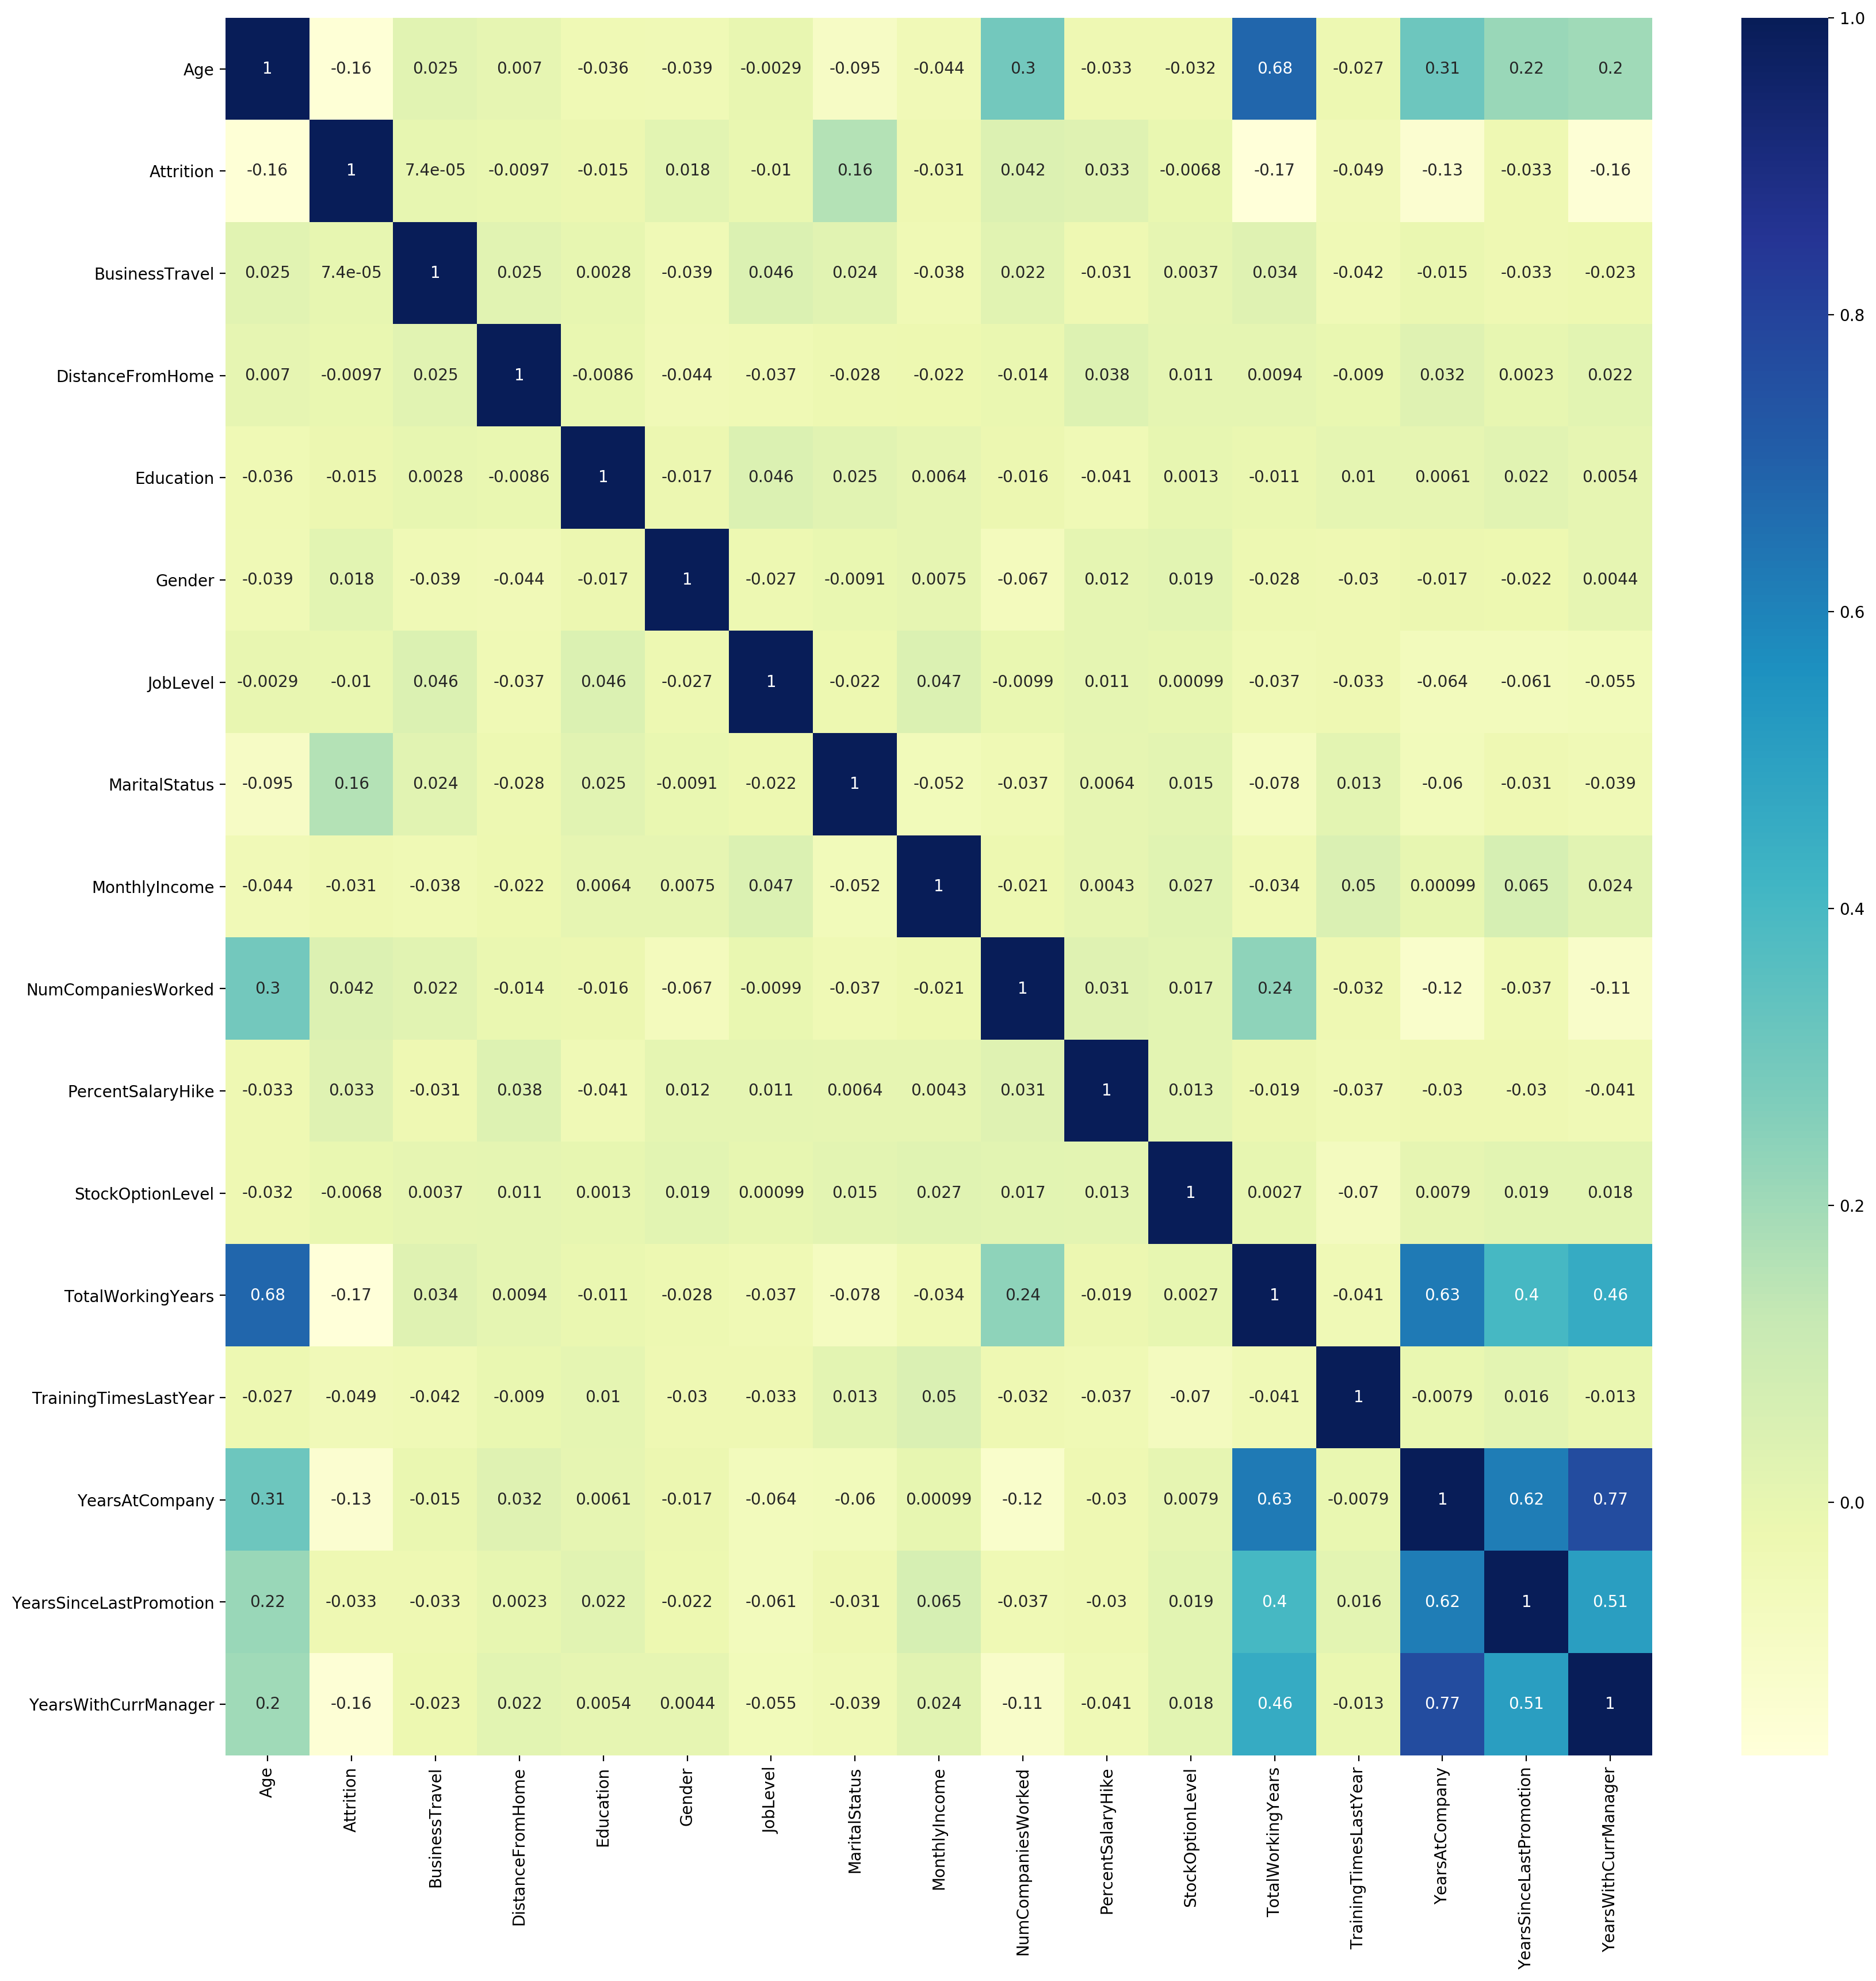

In [192]:
plt.figure(figsize= (20,20), dpi=200)
sns.heatmap(df_3.corr(), annot=True, cmap="YlGnBu")

##### As shown above, *Marital Status* is positively correlated to Attrition weakly followed by *NumCompanies* and *PercentSalaryHike*; while *TotalWorkingYears,Age, YearwithcurrManager and YearsAtCompany* are negatively correlated to *Attrition*. P-value of correlation test will be helpful in knowing the broader picture.

##### What else can be seen from the above heatmap? It is how poorly correlated varibales are. Some of the variables are stronlgy correlated which must be dropped before applying any model and that is not covered in this notebook for now. 

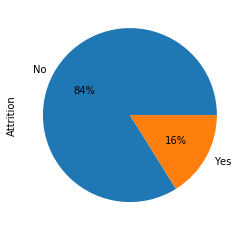

In [193]:
df.Attrition.value_counts().plot(kind='pie', autopct = "%1.0f%%")

In [194]:
print(int(711*100/3699), '% is the attrition rate recorded.')

19 % is the attrition rate recorded.


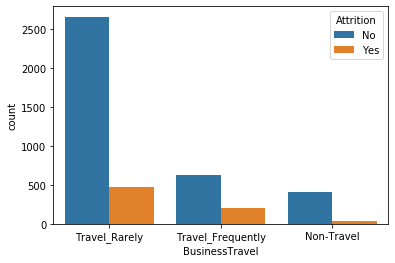

In [195]:
sns.countplot(hue= "Attrition",x ="BusinessTravel",data=df)

In [196]:
df_2[["Attrition","BusinessTravel"]].groupby(['BusinessTravel'], as_index=False).mean().sort_values(by='Attrition', ascending=False)

,BusinessTravel,Attrition
1,Travel_Frequently,0.249097
2,Travel_Rarely,0.149569
0,Non-Travel,0.080000


#### _25% of those who travel frequently leave the Company._

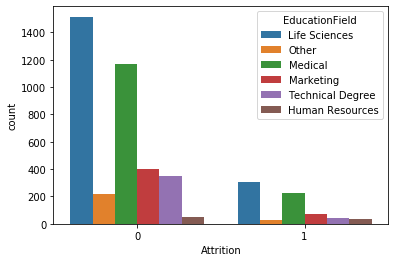

In [197]:
sns.countplot(x ="Attrition",hue ="EducationField",data=df_2)

In [198]:
df_2[["Attrition","EducationField"]].groupby(['EducationField'], as_index=False).mean().sort_values(by='Attrition', ascending=False)

,EducationField,Attrition
0,Human Resources,0.407407
1,Life Sciences,0.166667
3,Medical,0.161638
2,Marketing,0.157233
4,Other,0.121951
5,Technical Degree,0.113636


##### _40% of the Employees in HR Department leave the Company._

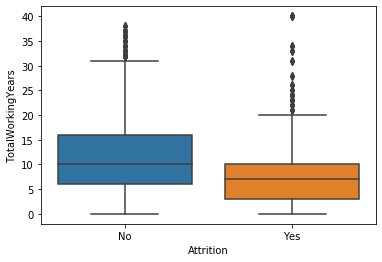

In [199]:
sns.boxplot(x='Attrition', y='TotalWorkingYears', data=df)

##### _The employee having Total Working Years less than or equal to 10 have high attrition rate._

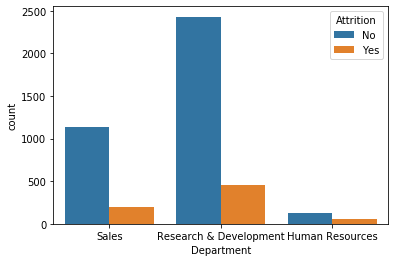

In [200]:
sns.countplot(x='Department', hue='Attrition', data=df)

##### _From the above chart, we see that since it cannot be conluded that one particular category is more likely to face attrition as the attrition here is clearly directly linked to the group sizes. For say, Research & Development Department has the highest group size and hence, more attrition took place for the same._

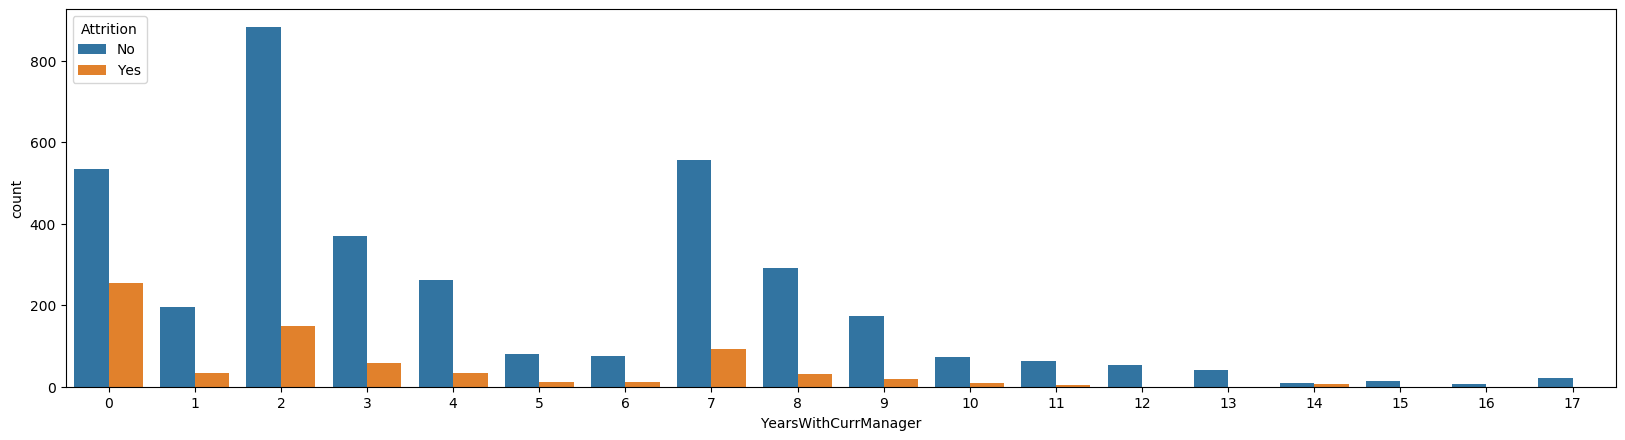

In [201]:
plt.figure(figsize= (20,5), dpi=100)
sns.countplot(x='YearsWithCurrManager', hue='Attrition', data=df)

##### _Employees with less than a year of work experience with the current manager left early. This might point to their bad performance._

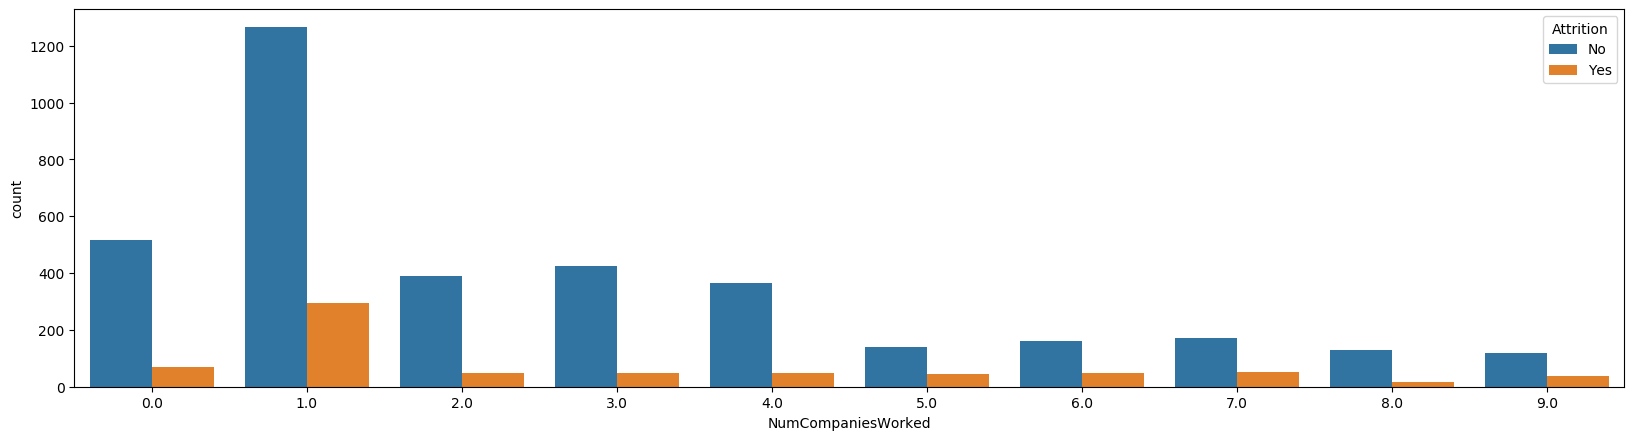

In [202]:
plt.figure(figsize= (20,5), dpi=100)
sns.countplot(x='NumCompaniesWorked', hue='Attrition', data=df)

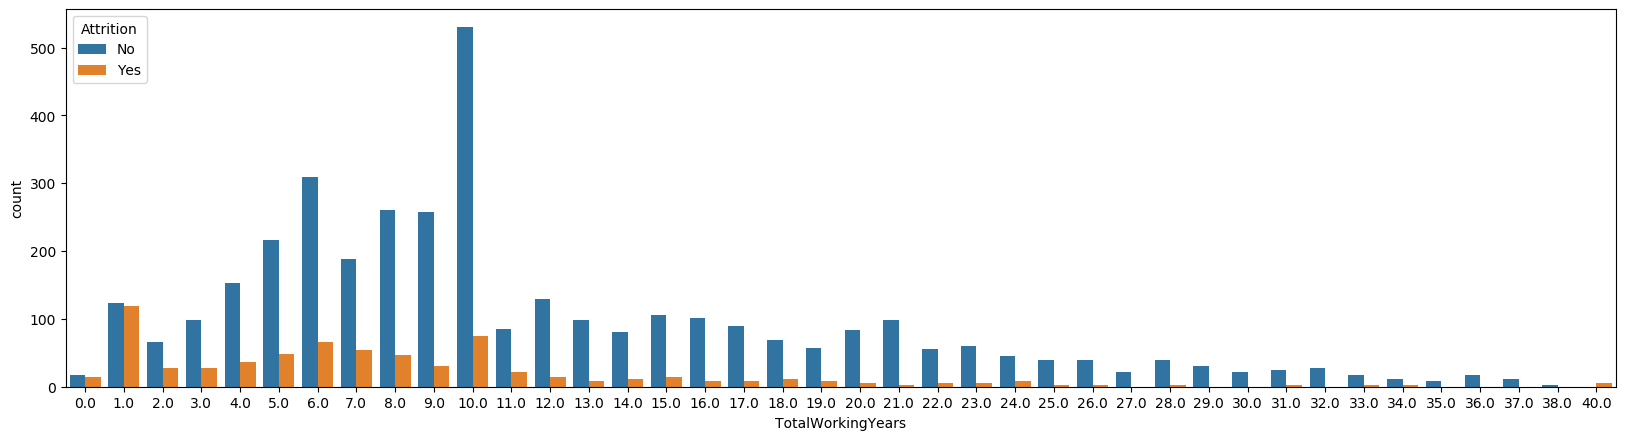

In [203]:
plt.figure(figsize= (20,5), dpi=100)
sns.countplot(x ='TotalWorkingYears', hue ='Attrition', data=df)

#### Form the above charts it can be seen that:
##### 1. Peaple with 0 to 1 year of working experience are very highly likely to leave the current company. 
##### 2. As employees with high experience are might be seeking stability and hance stays at the current company.


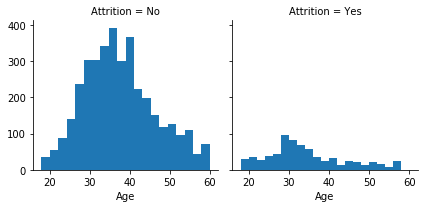

In [204]:
g = sns.FacetGrid(df, col='Attrition')
g.map(plt.hist, 'Age', bins=20)

###### _This is again in alignment with the TotalWorkingYears chart made above. That confirms our assumption that freshers are more likely to leave and experienced professionals are seeking stability here._

In [205]:
'''Hypothesis 
H0 = Attrition and Distance from Home have no correlation.
Ha = Attrition and Distance from Home have correlation.'''
stats,p = pearsonr(df_2.Attrition, df_2.DistanceFromHome)
print("r= ", stats, " & p= ", p)




r=  -0.009730141010179674  & p=  0.5182860428050771


##### p value being > 0.05 makes us accept our null hypotheses, H0.

##### Hence, there is no correlation between attrition and distance from home. 

In [206]:
'''Hypothesis 
H0 = Attrition and StockOptionLevel have no correlation.
Ha = Attrition and StockOptionLevel have correlation.'''
stats,p = pearsonr(df_2.Attrition, df_2.StockOptionLevel)
print("r= ", stats, " & p= ", p)

r=  -0.006838852403261513  & p=  0.6498072937475723


#### p value being > 0.05 makes us accept our null hypotheses, H0.

#### Hence, there is no correlation between attrition and stock option level.

In [207]:
'''Hypothesis 
H0 = Attrition and Training last year have no correlation.
Ha = Attrition and Tranining last year have correlation.'''
stats,p = pearsonr(df_2.Attrition, df_2.TrainingTimesLastYear)
print("r= ", stats, " & p= ", p)



r=  -0.049430576244255  & p=  0.0010247061915365072


#### _As r is negative,hence there could exists a negative relationship between attrition and number of training last year.

Further, p value being < 0.05 makes us reject our null hypotheses, H0.

Hence, there is a negative correlation between attrition and number of training last year.####

In [208]:
'''Hypothesis 
H0 = Attrition and Gender have no correlation.
Ha = Attrition and Gender have correlation.'''
stats,p = pearsonr(df_2.Attrition, df_3.Gender)
print("r= ", stats, " & p= ", p)


r=  0.018125078877010238  & p=  0.22881970951795952


##### _p value being > 0.05 makes us accept our null hypotheses, H0._ 

##### _Hence, there is no correlation between attrition and gender._

In [209]:
'''Hypothesis 
H0 = Attrition and Monthly Income have no correlation.
Ha = Attrition and Monthly Income have correlation.'''
stats,p = pearsonr(df_2.Attrition, df_2.MonthlyIncome)
print("r= ", stats, " & p= ", p)

r=  -0.031176281698115007  & p=  0.03842748490600132


##### p value being < 0.05 makes us accept our null hypotheses, H0.
##### Hence, there is a negative correlation between attrition and monthly income.

# Parametric Tests

### Sample Independent t test
#### H0 : Age sample means has no significant diffrence from Year WithCurrManager mean between attrition and non-attrition data frames
#### H1 : Age sample means has significant diffrence  Year WithCurrManager mean between attrition and non-attrition data frames

In [210]:
from scipy.stats import ttest_ind
stats, p = ttest_ind(Att_yes.YearsAtCompany, Att_not.YearsAtCompany)
print(f'The Value of p in t test is: {p}')
if p < 0.05:
    print('There is significant impact')
else:
    print('There is no significant impact')
    

The Value of p in t test is: 3.163883122491456e-19
There is significant impact


H0 : Age sample means has no significance differences in YearsWithCurrManager mean between attrition and non-attrition data frames
H1 : Age sample means has significant impact of YearsWithCurrManager

In [211]:
stats, p = ttest_ind(Att_yes.YearsWithCurrManager, Att_not.YearsWithCurrManager)
print(f'The Value of p in t test is: {p}')
if p < 0.05:
    print('There is significant impact')
else:
    print('There is no significant impact')
    

The Value of p in t test is: 1.7339322652918153e-25
There is significant impact


In [212]:
'''H0 : Age sample means has no significance differences in MonthlyIncome mean between attrition and non-attrition data frames
H1 : Age sample means has significant differences in MonthlyIncome mean between attrition and non-attrition data frames'''
from scipy.stats import ttest_ind
stats, p = ttest_ind(Att_yes.MonthlyIncome, Att_not.MonthlyIncome)
print(f'The Value of p in t test is: {p}')
if p < 0.05:
    print('There is significant impact')
else:
    print('There is no significant impact')
    

The Value of p in t test is: 0.03842748490605113
There is significant impact


In [213]:
'''H0 : Age sample means has no significanct differences in the DistanceFromHome mean between attrition and non-attrition data frames
H1 : Age sample means has significanct differences in the DistanceFromHome mean between attrition and non-attrition data frames'''
from scipy.stats import ttest_ind
stats, p = ttest_ind(Att_yes.DistanceFromHome, Att_not.DistanceFromHome)
print(f'The Value of p in t test is: {p}')
if p < 0.05:
    print('There is significant impact')
else:
    print('There is no significant impact')


The Value of p in t test is: 0.518286042805572
There is no significant impact


# Non-Parametric Tests
### Since no paired features are present we cannot do Wilcoxon Test and Freidman Test.
### Chi-Square Test

In [214]:
#Chi-Squared test 
#Gender and Attrition
crosstable1 = pd.crosstab(df.Attrition,df.Gender)
crosstable1


Gender,Female,Male
Attrition,,
No,1494,2205
Yes,270,441


In [219]:
stats, p, dof, expected = chi2_contingency(crosstable1)
print(f'The Value of p in chi2_contingency test is: {p}')
if p < 0.05:
    print('Gender impacts Attrition')
else:
    print('Gender doesn\'t impact Attrition')

The Value of p in chi2_contingency test is: 0.24529482862926827
Gender doesn't impact Attrition


In [220]:
stats, p, dof, expected = chi2_contingency(crosstable2)
print(f'The Value of p in chi2_contingency test is: {p}')
if p < 0.05:
    print('Department impacts Attrition')
else:
    print('Department doesn\'t impact Attrition_')

The Value of p in chi2_contingency test is: 4.820888218170406e-07
Department impacts Attrition


In [221]:
#Chi-Squared test 
#Marital Status and Attrition
crosstable3 = pd.crosstab(df.Attrition,df.MaritalStatus)
crosstable3


MaritalStatus,Divorced,Married,Single
Attrition,,,
No,882,1767,1050
Yes,99,252,360


In [222]:
print(f'The Value of p in chi2_contingency test is: {p}')
if p < 0.05:
    print('Marital Status impacts Attrition')
else:
    print('Marital Status doesn\'t impact Attrition_')

The Value of p in chi2_contingency test is: 4.820888218170406e-07
Marital Status impacts Attrition


## Mann Whitney U Test

In [223]:
stats, p = mannwhitneyu(Att_yes.DistanceFromHome, Att_not.DistanceFromHome)
print(f'The Value of p in mannwhitneyu test is: {p}')
if p < 0.05:
    print('There is significant impact')
else:
    print('There is no significant impact')

The Value of p in mannwhitneyu test is: 0.4629185205822659
There is no significant impact


In [224]:
stats, p = mannwhitneyu(Att_yes.YearsAtCompany, Att_not.YearsAtCompany)
print(f'The Value of p in mannwhitneyu test is: {p}')
if p < 0.05:
    print('There is significant impact')
else:
    print('There is no significant impact')

The Value of p in mannwhitneyu test is: 6.047598261692858e-37
There is significant impact


In [225]:
stats, p = mannwhitneyu(Att_yes.YearsAtCompany, Att_not.StockOptionLevel)
print(f'The Value of p in mannwhitneyu test is: {p}')
if p < 0.05:
    print('There is significant impact')
else:
    print('There is no significant impact')
    

The Value of p in mannwhitneyu test is: 7.878203086425128e-204
There is significant impact


## Insights:

###### 1. Single employees leaves the XYZ company more often.

###### 2. Employees who are made to travel frequently leaves the XYZ company more often.

######  3. Educational background in Human Resources tends to leave XYZ company more often.

###### 4. Employee in Human Resources department tends to leave XYZ company more often, also same can be inferred from point 3 as well.

###### 5. Employees who have less number of total working years or experience leaves the current company more often. Also, on the other end, experienced/oldest employees are seeking stability.

######  6. Younger  and 0 to 1 YearsWithCurrManager employees tend to leave the XYZ company more often.

###### 7.  Strong negative correlation exist for YearsAtCompany which means that employees who have spent less number of years in company leaves the company more often.